# Comman patterns

In [0]:
import numpy as np
import matplotlib.pyplot as plt

## Function to plot the series graph 

In [0]:
def plotTimeSeries(time, series, format="-", start=0, end=None, label=None):
  plt.plot(time[start:end],series[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("Value")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

## Trend and Seasonality

In [0]:
def trend(time, slope=0):
  return slope*time

creating a time series that trends upward

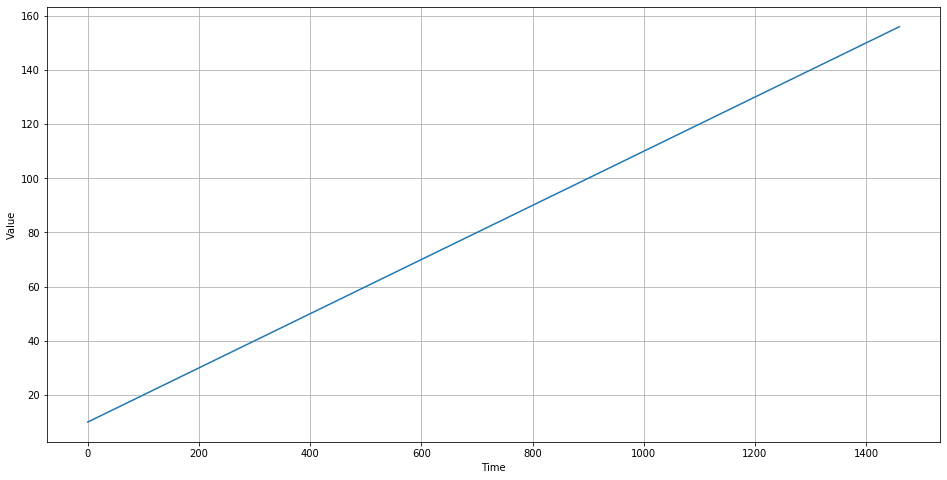

In [61]:
time = np.arange(4*365 + 1)
baseline =10 
series = baseline +trend(time,0.1)

plt.figure(figsize=(16,8 ))
plotTimeSeries(time,series)
plt.show()

In [62]:
time

array([   0,    1,    2, ..., 1458, 1459, 1460])

In [63]:
series

array([ 10. ,  10.1,  10.2, ..., 155.8, 155.9, 156. ])

Now lets generate a time series with a seasonal pattern 


In [0]:
def seasonalPattern(seasonal):
  return np.where(seasonal <0.4,
                  np.cos(seasonal*2*np.pi),
                  1/np.exp(3* seasonal))

def seasonality (time, period, amplitude=1, phase =0 ):
  seasonal = ((time+phase)% period) /period
  return amplitude * seasonalPattern(seasonal)



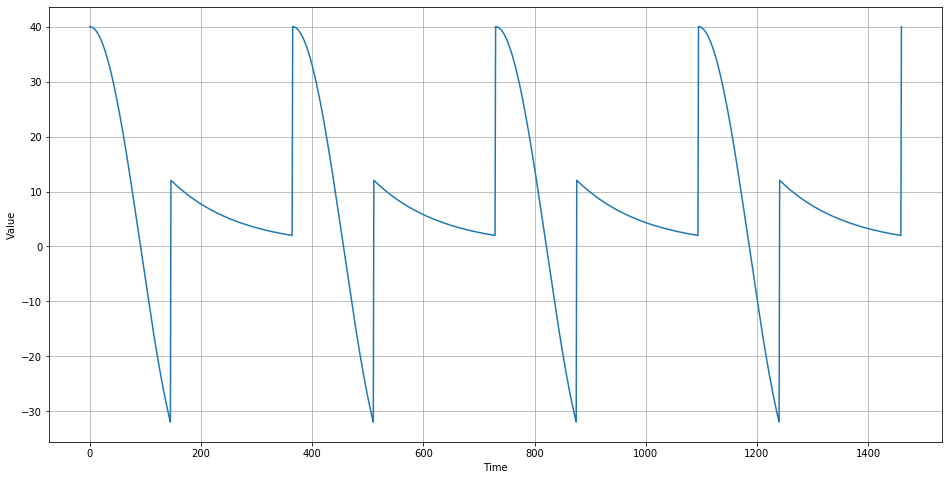

In [65]:
amplitude = 40 
series= seasonality(time, period= 365, amplitude=amplitude)

plt.figure(figsize=(16,8))
plotTimeSeries(time, series)
plt.show()

## Time series with both trend + seasonality 

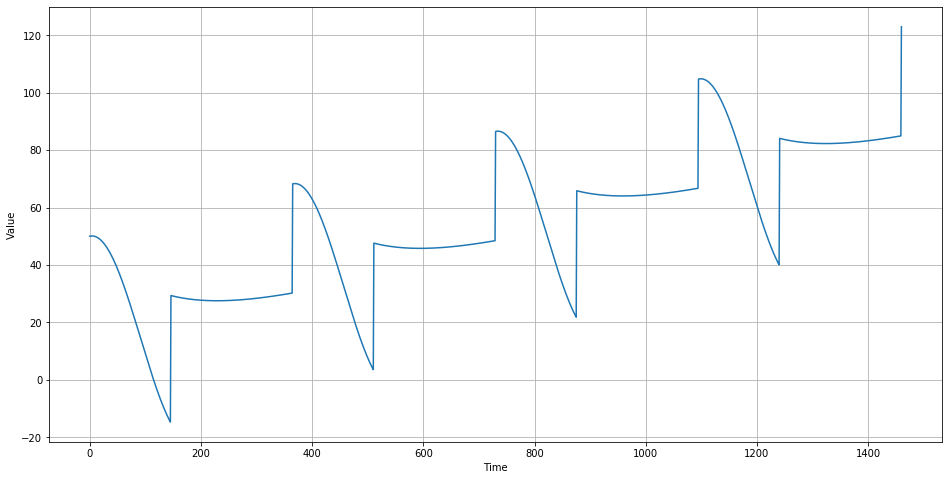

In [66]:
slope = 0.05
series= baseline +trend(time,slope)+ seasonality(time, period=365, amplitude=amplitude)

plt.figure(figsize=(16,8))
plotTimeSeries(time, series)
plt.show()

## Adding Noise

In Real life time series usually have noise, and the signal to noise raio can sometimes be very low . 

In [0]:
# Genrating white noise 
def whiteNoise( time, noise_level =1 , seed =None):
  rand =np.random.RandomState(seed)
  return rand.randn(len(time))*noise_level

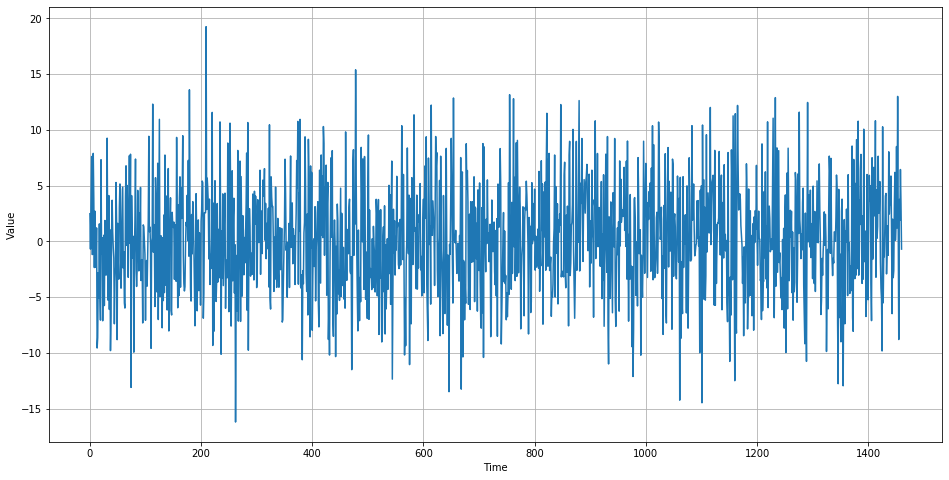

In [68]:
noise_level = 5
noise = whiteNoise(time,noise_level, seed=42)

plt.figure(figsize=(16,8))
plotTimeSeries(time, noise)
plt.show()

## Addding the noise to the time series (Trend + Seasonality + Noise)

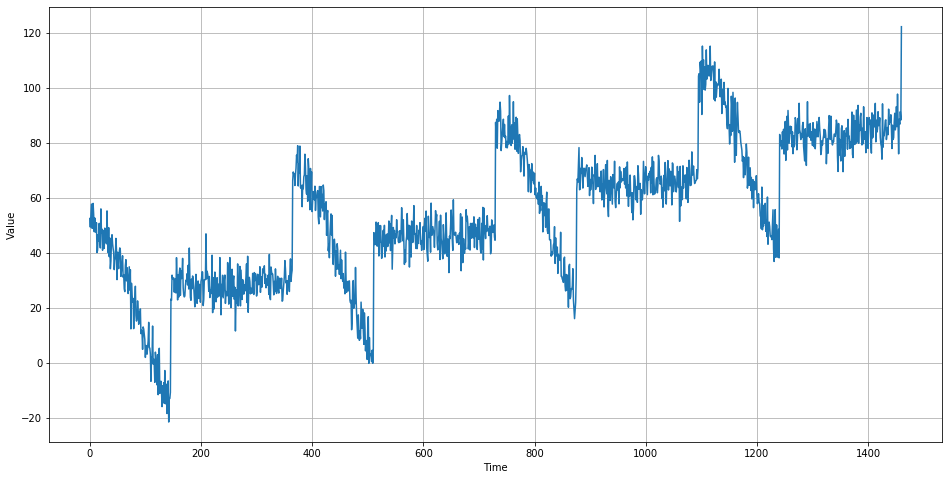

In [69]:
series += noise
plt.figure(figsize=(16,8))
plotTimeSeries(time,series)
plt.show()